# Airfoil Explorer

Notebook to quickly select and plot airfoils from the UIUC airfoil data base. It might do more stuff in the future

Quick instructions:

This file **must** be part of your nemo repository and thus is located at NEMO_ROOT/wings

You **must** have placed a shortcut/symlink to the dropbox folder at your NEMO_ROOT called 'dbfiles'

- Authors: Diego Montero, Fernando Valentini, Gustavo Violato
- First release: Nov. 2015

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import os
import os.path as pth
import airfoil_tools as at
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as wd
from glob import glob

In [4]:
# User defines variables
root = os.environ['NEMO_ROOT']
airfoil_db_path = root+'/dbfiles/subsistemas/airfoils/uiuc/coordinates'
polar_db_path = root+'/dbfiles/subsistemas/airfoils/uiuc/results'

In [4]:
foilfiles = glob(airfoil_db_path+'/*.dat')
foilnames = [pth.basename(foil)[:-4] for foil in foilfiles]
foilnames.sort()

(0, 1)

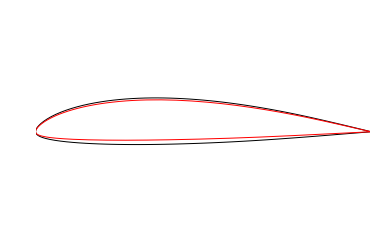

In [5]:
foilname = ['mrc-16']
match = [fpth for fpth in foilfiles if foilname[0] in fpth]
airfoil = at.ReadAirfoil(match[0])
tck     = at.GetFoilThickness(airfoil)
camberl = at.GetFoilCamberline(airfoil)
props   = at.GetFoilProps(airfoil)
mod_tck = 0.12/props['t/c']*tck[:,1:]
mod_cbr = 0.035/props['h/c']*camberl[:,1:]
mod_up  = mod_cbr + mod_tck/2
mod_lo  = mod_cbr - mod_tck/2
mod_c_up = np.hstack((tck[::-1,0:1],mod_up[::-1,0:]))
mod_c_lo = np.hstack((tck[1:,0:1],mod_lo[1:,0:]))
mod_coords = np.vstack((mod_c_up,mod_c_lo))
fig, ax = plt.subplots()
plt.plot(airfoil['coords'][:,0],airfoil['coords'][:,1],'k')
plt.plot(mod_coords[:,0],mod_coords[:,1],'r')
plt.axis('equal')
plt.axis('off')
ax.set_xlim([0, 1])
#print mod_coords

In [6]:
mod_airfoil={'name':'GV08','coords':mod_coords}
at.WriteAirfoil('./gv08.dat',mod_airfoil)

In [5]:
airfoil = at.ReadAirfoil(airfoil_db_path + '/gv03.dat')

In [10]:
np.savetxt('gv03.txt', airfoil['coords']*140, fmt='%.2f', delimiter='\t', newline='\n')

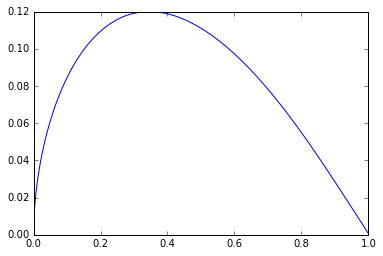

In [7]:
t = at.GetFoilThickness(airfoil)
plt.plot(t[:,0],t[:,1])

In [8]:
t

array([[  0.00000000e+00,   0.00000000e+00],
       [  5.18163177e-04,   5.61666625e-03],
       [  2.07157873e-03,   1.19592800e-02],
       [  4.65702698e-03,   1.82220469e-02],
       [  8.26914918e-03,   2.45052030e-02],
       [  1.29004587e-02,   3.08065136e-02],
       [  1.85413563e-02,   3.71233406e-02],
       [  2.51801505e-02,   4.34691239e-02],
       [  3.28030814e-02,   4.97440579e-02],
       [  4.13943492e-02,   5.58502184e-02],
       [  5.09361473e-02,   6.18180834e-02],
       [  6.14086988e-02,   6.77438296e-02],
       [  7.27902977e-02,   7.33601299e-02],
       [  8.50573540e-02,   7.87131395e-02],
       [  9.81844423e-02,   8.38861561e-02],
       [  1.12144355e-01,   8.88121103e-02],
       [  1.26908157e-01,   9.34030433e-02],
       [  1.42445249e-01,   9.76830601e-02],
       [  1.58723428e-01,   1.01606090e-01],
       [  1.75708955e-01,   1.05178991e-01],
       [  1.93366625e-01,   1.08391932e-01],
       [  2.11659839e-01,   1.11235975e-01],
       [  

In [11]:
print "Considerando a corda entre 27 e 42% - espessura relativa entre 11.75% e 12%"
print "Largura Raiz: {:.3f}".format(0.146*(0.42-0.27))
print "Altura Raiz: {:.3f}".format(0.146*0.1175)
print "Largura Ponta: {:.3f}".format(0.066*(0.42-0.27))
print "Altura Ponta: {:.3f}".format(0.066*0.1175)

Considerando a corda entre 27 e 42% - espessura relativa entre 11.75% e 12%
Largura Raiz: 0.022
Altura Raiz: 0.017
Largura Ponta: 0.010
Altura Ponta: 0.008


In [10]:
print "Considerando a corda entre 25 e 44% - espessura relativa entre 11.6% e 12%"
print "Largura Raiz: {:.3f}".format(0.146*(0.44-0.25))
print "Altura Raiz: {:.3f}".format(0.146*0.116)
print "Largura Ponta: {:.3f}".format(0.066*(0.44-0.25))
print "Altura Ponta: {:.3f}".format(0.066*0.116)

Considerando a corda entre 25 e 44% - espessura relativa entre 11.6% e 12%
Largura Raiz: 0.028
Altura Raiz: 0.017
Largura Ponta: 0.013
Altura Ponta: 0.008


t/c: 0.109
h/c: 0.042


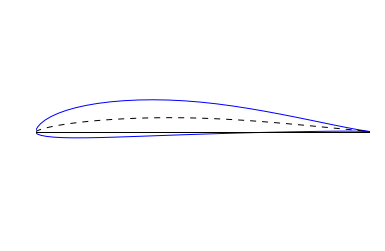

In [9]:
def plotchosenfoil(foilname):
    match = [fpth for fpth in foilfiles if foilname[0] in fpth]
    airfoil = at.ReadAirfoil(match[0])
    props = at.GetFoilProps(airfoil)
    for k in props.keys():
        print k + ': {:.3f}'.format(props[k])
    plt.plot(airfoil['coords'][:,0],airfoil['coords'][:,1])
    plt.plot([0,1],[0,0],'k')
    camberl = at.GetFoilCamberline(airfoil)
    plt.plot(camberl[:,0],camberl[:,1],'k--')
    plt.axis('equal')
    plt.axis('off')

wd.interact(plotchosenfoil,
                 foilname=wd.SelectMultiple(
        description="airfoils",
        options=foilnames))

In [11]:
polarfiles = glob(polar_db_path+'/*.pol')
pol_foilnames = [pth.basename(foil)[:-4] for foil in polarfiles]
pol_foilnames.sort()

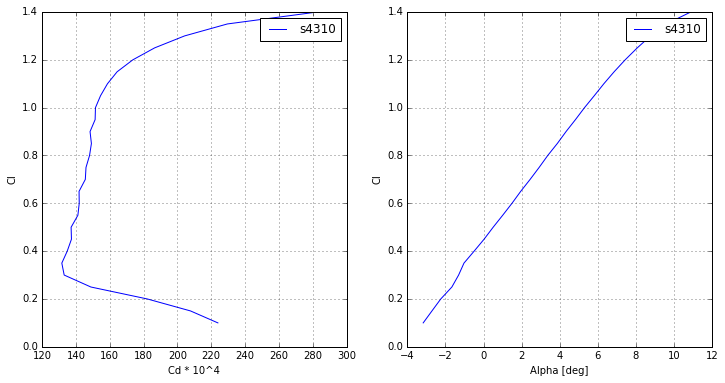

In [12]:
def plotpolar(foilname):
    fig = plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.xlabel('Cd * 10^4')
    plt.ylabel('Cl')
    plt.grid(True)
    plt.subplot(1,2,2)
    plt.xlabel('Alpha [deg]')
    plt.ylabel('Cl')
    plt.grid(True)
    for foil in foilname:
        match = [fpth for fpth in polarfiles if foil in fpth]
        polar = np.loadtxt(match[0],skiprows=12)
        ax1 = plt.subplot(1,2,1)
        plt.plot(polar[:,2]*1e4,polar[:,1],label=foil)
        ax2 = plt.subplot(1,2,2)
        plt.plot(polar[:,0],polar[:,1],label=foil)
    ax1.legend()
    ax2.legend()
 
wd.interact(plotpolar,
            foilname=wd.SelectMultiple(
            description="airfoils",
            options=pol_foilnames))

In [14]:
foil='n0015'
match = [fpth for fpth in polarfiles if foil in fpth]
polar = np.loadtxt(match[0],skiprows=12)

In [16]:
from scipy.stats import linregress

In [21]:
polar[:,:5]

array([[ -5.00000000e+00,  -5.34500000e-01,   9.23000000e-03,
          2.00000000e-03,  -8.20000000e-03],
       [ -4.00000000e+00,  -4.24800000e-01,   8.27000000e-03,
          1.60000000e-03,  -7.40000000e-03],
       [ -3.00000000e+00,  -3.19800000e-01,   7.58000000e-03,
          1.29000000e-03,  -5.30000000e-03],
       [ -2.00000000e+00,  -2.13500000e-01,   7.15000000e-03,
          1.08000000e-03,  -3.40000000e-03],
       [ -1.00000000e+00,  -1.06700000e-01,   6.92000000e-03,
          9.50000000e-04,  -1.70000000e-03],
       [  0.00000000e+00,   0.00000000e+00,   6.85000000e-03,
          9.10000000e-04,  -0.00000000e+00],
       [  1.00000000e+00,   1.06700000e-01,   6.92000000e-03,
          9.50000000e-04,   1.70000000e-03],
       [  2.00000000e+00,   2.13500000e-01,   7.15000000e-03,
          1.08000000e-03,   3.40000000e-03],
       [  3.00000000e+00,   3.19800000e-01,   7.58000000e-03,
          1.29000000e-03,   5.30000000e-03],
       [  4.00000000e+00,   4.2490000

Cla: 6.264
Cl0: 0.0


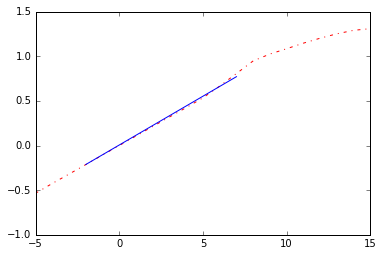

In [18]:
lp = linregress(polar[:-4,0]*np.pi/180,polar[:-4,1])
a = np.linspace(-2,7,10)
cl = a*lp.slope*np.pi/180 + lp.intercept
print "Cla: {:.3f}".format(lp.slope)
print "Cl0: {:.1f}".format(lp.intercept)
plt.plot(polar[:,0],polar[:,1],'-.r')
plt.plot(a,cl,'b')

In [19]:
lp.slope/(2*np.pi)

0.99692892620509155

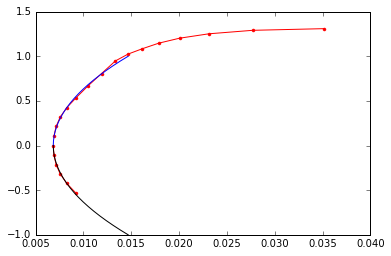

In [22]:
NU = 6
clu = 1.0
cdu = 0.01468
cll = -1.0
cdl = 0.01468
clmin = 0.
cdmin = 0.00685
# Lower
al = (cdl-cdmin)/(cll-clmin)**2
bl = -2*al*clmin
cl = cdmin + al*clmin**2
clls = np.linspace(cll,clmin,20)
cdls = al*clls**2 + bl*clls + cl
# Upper
au = (cdu-cdmin)/(clu-clmin)**2
bu = -2*au*clmin
cu = cdmin + au*clmin**2
clus = np.linspace(clmin,clu,20)
cdus = au*clus**2 + bu*clus + cu
# Plots
plt.plot(polar[NU:,2],polar[NU:,1],'.-r')
plt.plot(polar[:NU,2],polar[:NU,1],'.-r')
plt.plot(cdus,clus,'b')
plt.plot(cdls,clls,'k')